# The Classical Shadow of Unknown Quantum States

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## Overview

For the quantum state $\rho$ in an unknown quantum system, obtaining the information it contains is a fundamental and essential problem. This tutorial will discuss how to use the classical shadow to describe an unknown quantum state with classical data so that many quantum state properties can be efficiently estimated. In the era of NISQ (noisy intermediate-scale quantum), the classical shadow helps us trade quantum for classical resources. After describing the information of the quantum state with classical data, some quantum problems can be solved by methods such as classical machine learning. And using this method, the cost of the quantum circuit running times in some existing variational quantum algorithms like variational quantum eigensolver (VQE) may be reduced so that an acceleration can be achieved.

## The Classical Shadow

The intuition of the classic shadow comes from shadows in real life. If we use a beam of light to illuminate a polyhedron vertically, we get a shadow of it. Rotating this polyhedron, we can see its different shadows. After many rotations, this series of shadows naturally reflect some information about this polyhedron. Similarly, in the quantum world, if we perform a unitary transformation on a quantum state and then perform a measurement, can we also get a "shadow" of the quantum state? The construction of the classical shadow is analogous to this example. Its construction process is as follows:

First, we apply a unitary transformation to an unknown quantum state $\rho$ in a $n$ qubits system: $\rho \mapsto U \rho U^{\dagger}$, and then measure each qubit in the computational basis. For the measurement result, we use $|\hat{b}\rangle$ as an example. We perform the inverse transformation of the previous unitary on $|\hat{b}\rangle$ to get $U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U$. We know that the expectation value of measured quantum state $|\hat{b}\rangle\langle\hat{b}|$ is: 

$$
\mathbb{E}(|\hat{b}\rangle\langle\hat{b}|) =  \sum_{b \in \{0,1\}^{n}} \operatorname{Pr}(|\hat{b}\rangle\langle\hat{b}| = |b\rangle\langle b|)\cdot |b\rangle \langle b|=  \sum_{b \in \{0,1\}^{n}}\langle b|U\rho U^{\dagger} |b\rangle |b\rangle \langle b| \tag{1}
$$

Then after the reverse operation, the expectation value of $U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U$ is $\sum_{b \in \{0,1\}^{n}}\langle b|U\rho U^{\dagger} |b\rangle U^{\dagger}|b\rangle \langle b|U$. In this process, the unitary transformation $U$ is randomly selected from a fixed set. 
When we repeat this process and average $U$, we can get:

$$
\mathbb{E}_{U \sim \mathcal{U}\left(n\right)}(\mathbb{E}(U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U))=\sum_{b \in \{0,1\}^{n}}\mathbb{E}_{U \sim \mathcal{U}\left(n\right)}(\langle b|U\rho U^{\dagger} |b\rangle U^{\dagger}|b\rangle \langle b|U) \tag{2}
$$ 
where $\mathcal{U}\left(n\right)$ is a given unitary transformation set on $n$ qubits.

If this expectation value is recorded as $\mathcal{M}(\rho)$, then $\mathcal{M}$ will be a map from $\rho$ to $\mathcal{M}(\rho)$. When $\mathcal{M}$ is linear and reversible [1], the initial quantum state $\rho$ can be expressed as:

$$
\rho=\mathcal{M}^{-1}(\mathbb{E}_{U \sim \mathcal{U} \left(n\right)}(\mathbb{E}(U^{\dagger}|\hat{b}\rangle\langle \hat{b}|U))) = \mathbb{E}_{U \sim \mathcal{U} \left(n\right)}(\mathbb{E}(\mathcal{M}^{-1} (U^{\dagger}|\hat{b}\rangle\langle \hat{b}|U))) \tag{3}
$$


With $\mathcal{M}^{-1}$, every time $U$ is sampled,  we compute $\hat{\rho} = \mathcal{M }^{-1}(U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U)$ and  name it a snapshot. After repeating this process $N$ times, we get $N$ collections of snapshots about $\rho$:


$$
\text{S}(\rho ; N)=\{\hat{\rho}_{1}=\mathcal{M}^{-1}(U_{1}^{\dagger}|\hat{b}_{1}\rangle\langle\hat{b}_{1}| U_{1}), \ldots, \hat{\rho}_{N}=\mathcal{M}^{-1}(U_{N}^{\dagger}|\hat{b}_{N}\rangle\langle\hat{b}_{N}| U_{N})\} .\tag{4}
$$

We call $\text{S}(\rho; N)$ the classical shadow of $\rho$. It is worth mentioning that what exactly $\mathcal{M}$ is depends on the sampling set $\mathcal{U}$ we select. For example, when we select the Clifford group as the sampling set $\mathcal{U}$, we have:

$$
\mathcal{M}(\rho)=\mathbb{E}_{U \sim \operatorname{Cl} \left(n\right)}(\mathbb{E}(U^{\dagger}|\hat{b}\rangle\langle \hat{b}|U)) = \frac{1}{2^{n}+1}\rho+\frac{1}{2^{n}+1}I. \tag{5}
$$

Readers may refer to [1] for details about why $\mathcal{M}$ is as (5). It follows:

$$\mathcal{M}^{-1}(\frac{1}{2^{n}+1}\rho+\frac{1}{2^{n}+1}I)=\rho \Rightarrow \mathcal{M}^{-1}(\rho) = (2^{n}+1)\rho-I \tag{6}$$

After constructing the classical shadow, how does it help us to effectively estimate the properties of the quantum state? Some linear properties of quantum state $\rho$ are very suitable to be estimated by the classical shadow, for example, the expectation value of $\rho$ of an observable $\mathcal{O}$: $o =\operatorname{tr}\left(\mathcal{O} \rho\right)$ [1]. Let $\hat{o}=\operatorname{tr}\left(\mathcal{O} \hat{\rho}\right)$, then according to (3), there is $\mathbb{E}[\hat{o}]=\operatorname{tr}\left(\mathcal{O} \rho\right)$. We provide detailed applications and implementations in our following tutorial: [Estimation of Quantum State Properties Based on the Classical Shadow](./ClassicalShadow_Application_EN.ipynb).

Next, we will show the process of constructing the classical shadow for a randomly selected quantum state $\rho$ in Paddle Quantum to help readers understand how the classical shadow works. And we will use the Clifford group as the sampling set of the unitary transformation (specifically about the properties of the Clifford group and how to sample uniformly distributed Clifford operators from it randomly, readers can refer to [1], [3], and the `Clifford` class in Paddle Quantum).

## Paddle Quantum Implementation

First, we need to import all the dependencies:

In [1]:
import numpy as np
import paddle
import matplotlib.pyplot as plt
from paddle_quantum.clifford import Clifford
from paddle_quantum.state import vec_random
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import trace_distance

Next, we randomly generate a quantum state $\rho$.

In [2]:
# Number of qubits
n_qubit = 2

# Randomly generate a state vector
phi_random = vec_random(n_qubit) 
# Its density matrix form
rho_random = np.outer(phi_random, phi_random.conj())

# Define |0> and |1>
ket_0 = np.array([[1,0]]).T
ket_1 = np.array([[0,1]]).T
I = np.identity(1<<n_qubit)
coefficient = float(1<<n_qubit) + 1.0

In the next step, we define the circuit required for the measurement and prepare us to record the results.

In [3]:
def measure_by_clifford(phi, num_qubit):
    """
    After applying Clifford operation on phi, obtain measurement in the computational basis
    """
    # Use the Clifford class of Paddle Quantum to randomly select a Clifford operator and generate its circuit
    clif = Clifford(num_qubit)
    cir = clif.circuit()
    
    # Use phi as the input state and run it
    cir.run_state_vector(paddle.to_tensor(phi))
    # Single measurement
    bitstring, = cir.measure(shots=1)
    cl = cir.U.numpy()
    
    # Use this to record results of measurement
    bhat = np.eye(1) 
    for i in bitstring:
        if i == '0':
            bhat = np.kron(bhat, ket_0)
        elif i == '1':
            bhat = np.kron(bhat, ket_1)
    return bhat, cl

### Sampling unitary and building the classical shadow

In [7]:
# Select the number of samples
S = 800
estimator_rho = []
tracedistance = []

for sample in range(S):

    bhat, cl = measure_by_clifford(phi_random, n_qubit)
    
    # Get the shadow according to the deduced M inverse
    hat_rho = coefficient * cl.conj().T @ np.kron(bhat, bhat.conj().T) @ cl - I
    estimator_rho.append(hat_rho)
    
    # Compute the average of the shadows 
    # Because in actual operation, we cannot achieve the expectation value in (3), we can only approximate rho by averaging the classical shadow obtained.
    ave_estimate = sum(estimator_rho) / len(estimator_rho)
    
    # Calculate trace distance
    tracedistance.append(trace_distance(rho_random, ave_estimate).real)

Finally, we output the matrix representation of an approximation of $\rho$ by the classical shadow and the real $\rho$. Also, we output their trace distance. The closer the trace distance is to 0, the closer the approximation is to the real quantum state.

In [10]:
print('Approximation: ', np.around(ave_estimate, decimals=3))
print('-' * 50)
print('Real state: ', np.around(rho_random, decimals=3))
print('Trace distance between approximation and real state: ', np.around(tracedistance[-1], decimals=3))

Approximation:  [[ 0.166+0.j    -0.178+0.288j -0.145+0.027j  0.058+0.092j]
 [-0.178-0.288j  0.716+0.j     0.192+0.211j  0.027-0.217j]
 [-0.145-0.027j  0.192-0.211j  0.081+0.j    -0.069-0.116j]
 [ 0.058-0.092j  0.027+0.217j -0.069+0.116j  0.037+0.j   ]]
--------------------------------------------------
Real state:  [[ 0.147+0.j    -0.189+0.247j -0.143+0.014j  0.053+0.075j]
 [-0.189-0.247j  0.656+0.j     0.207+0.221j  0.058-0.185j]
 [-0.143-0.014j  0.207-0.221j  0.14 +0.j    -0.044-0.078j]
 [ 0.053-0.075j  0.058+0.185j -0.044+0.078j  0.057+0.j   ]]
Trace distance between approximation and real state:  0.122


As you can see, our approximation of $\rho$ is very close to the real quantum state $\rho$ in the matrix representation. With about 800 samplings, the trace distance between the approximation and the real state is already around 0.1. The relation between their trace distance and the number of samplings is shown below.

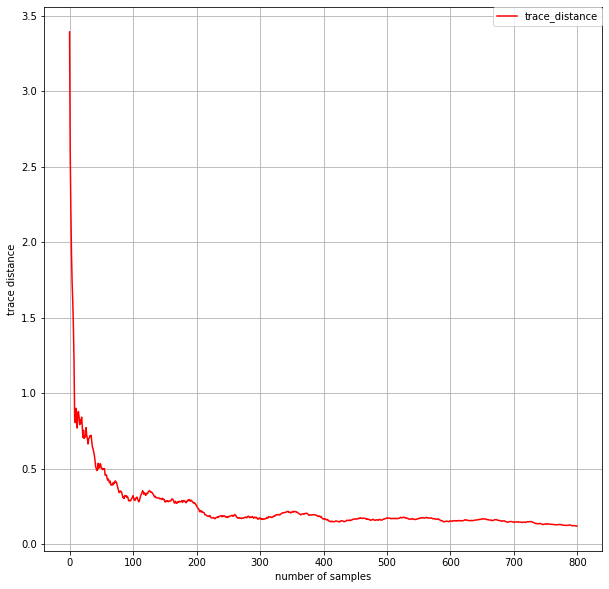

In [9]:
# Print out the result
fig,ax = plt.subplots(figsize=(10, 10))
 
plt.xlabel('number of samples')
plt.ylabel('trace distance')
j = range(len(tracedistance)) 
plt.plot(j, tracedistance, 'r', label="trace_distance")
"""open the grid"""
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

## Conclusion

This tutorial introduces some theoretical knowledge of the classical shadow. In this example, we constructed the classical shadow of a random 2-qubit quantum state in Paddle Quantum. We can intuitively understand that the classic shadow can make a good approximation to an unknown quantum state. In fact, [2] pointed out demanding full classical descriptions of quantum systems may be excessive for many concrete tasks. Instead, it is often sufficient to accurately predict certain properties of the quantum system. This is where the fundamental importance of the classical shadow lies. Another tutorial ([Estimation of Quantum State Properties Based on the Classical Shadow](./ClassicalShadow_Application_EN.ipynb)) will continue to introduce the applications of the classic shadow and how to use shadow function in Paddle Quantum.

## References
[1] Huang, Hsin-Yuan, Richard Kueng, and John Preskill. "Predicting many properties of a quantum system from very few measurements." [Nature Physics 16.10 (2020): 1050-1057.](https://authors.library.caltech.edu/102787/1/2002.08953.pdf)  

[2] Aaronson, Scott. "Shadow tomography of quantum states." [SIAM Journal on Computing 49.5 (2019): STOC18-368.](https://dl.acm.org/doi/abs/10.1145/3188745.3188802)  

[3] Bravyi, Sergey, and Dmitri Maslov. "Hadamard-free circuits expose the structure of the Clifford group." [IEEE Transactions on Information Theory 67.7 (2021): 4546-4563.](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9435351)